<h1><center style="color:red; font-size:50px;">🏠 House Price Prediction Using Machine Learning And Deep Learning 🏠</center><h1>
    
    
<p><center>Thank you for visiting my notebook</center></p>    
    
    
<center><img src="https://media.giphy.com/media/sNWGEbc5Jzp4c/giphy.gif"></center>    
    

#  🔬Overview
<div style="background-color:#fff1cc;font-size:20px">
<p><center >  The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Various machine learning alorithms used to find the answer with the maximum accuracy.</center></p>
    </div>

# import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


# Importing the dataset

In [2]:
data=pd.read_csv("/kaggle/input/housedata/data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Data preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
data.shape

(4600, 18)

# Exploratory Data Analysis

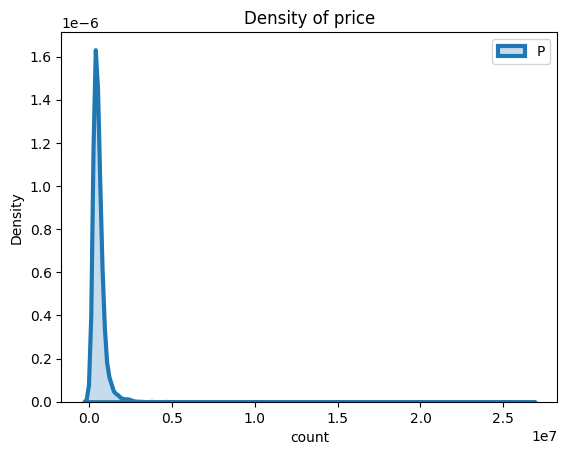

In [7]:
import warnings
  

warnings.filterwarnings('ignore')
sns.distplot(data['price'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.xlabel("count")
plt.ylabel("Density")
plt.title("Density of price")
plt.legend("Price")
plt.show()

### Price is highly concentrated as see into the graph and stadard deviation is 563773

Text(0, 0.5, 'Density')

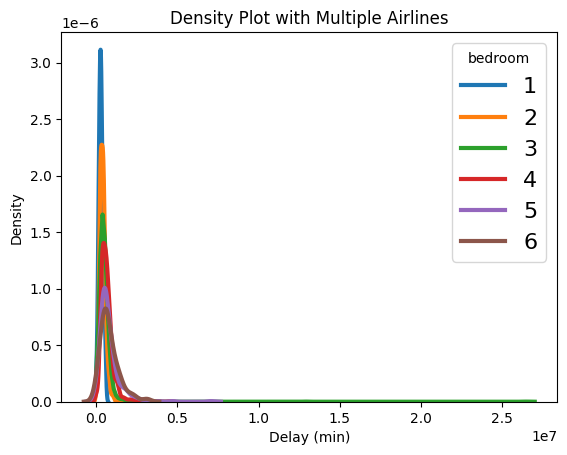

In [8]:
bed=[1,2,3,4,5,6]
# Iterate through the five airlines
for i in bed:
    # Subset to the airline
    subset = data[data['bedrooms'] == i]
    
    # Draw the density plot
    sns.distplot(subset['price'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'bedroom')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

In [9]:
bedrooms=data['bedrooms'].value_counts()
bedrooms

import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`

fig = px.pie(data, values='price', names='bedrooms')
fig.show()

# Train model

In [10]:
new_data=data.copy()
new_data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [11]:

#delete the columns with help of the pandas drop
new_data=new_data.drop(['date','street','statezip'],axis=1)


In [12]:
print(" new shape of datasets",new_data.shape)
new_data.head()

b=(new_data.columns)

 new shape of datasets (4600, 15)


In [13]:
# converting the text data into the numerical form

new_data['city']=pd.factorize(new_data['city'])[0]
new_data['country']=pd.factorize(new_data['city'])[0]




# Train Model

In [14]:
# standard scalling on the dataset 
# importing stadard scalling for the fature scalling of values 


from sklearn.preprocessing import StandardScaler


a=StandardScaler()


new_data=a.fit_transform(new_data)


new_data=pd.DataFrame(new_data,columns=b)#with the help of the pandas converted into the dataframe 


new_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,-0.932857,-0.932857
1,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,-0.823706,-0.823706
2,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,-0.714556,-0.714556
3,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,-0.605405,-0.605405
4,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,-0.496255,-0.496255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.432437,-0.441122,-0.524202,-0.653458,-0.236689,-0.951388,-0.085004,-0.309194,0.809652,-0.368025,-0.672464,-0.564651,1.195121,-0.823706,-0.823706
4596,-0.031271,-0.441122,0.432802,-0.705374,-0.202882,0.906555,-0.085004,-0.309194,-0.667112,-0.426025,-0.672464,0.410840,1.225755,-0.605405,-0.605405
4597,-0.239562,-0.441122,0.432802,0.904009,-0.218462,0.906555,-0.085004,-0.309194,-0.667112,1.371962,-0.672464,1.285418,-0.825693,1.031852,1.031852
4598,-0.618268,0.659291,-0.205201,-0.051238,-0.229164,-0.951388,-0.085004,-0.309194,-0.667112,-0.878421,1.525401,0.108101,-0.825693,-0.823706,-0.823706


In [15]:
x=new_data.drop('price',axis=1)
y=new_data[['price']]

In [16]:
# from sklearn importing the train_test_spilt for the dividing the data for training and testing


from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y)



# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()  
slr.fit(x_train, y_train)


y_pred= slr.predict(x_test)

y_pred.shape
y_test.shape

(1150, 1)

In [18]:
print("Intercept: ", slr.intercept_)
print("Coefficient: ", slr.coef_)

Intercept:  [0.00486812]
Coefficient:  [[-9.59843681e-02  8.63630141e-02 -1.59727533e+12 -3.73351152e-02
   9.53830961e-03  5.35907198e-02  5.78418512e-02  4.55202316e-02
   1.42972524e+12  7.69673610e+11 -9.91216965e-02  1.44416419e-02
   5.41689097e+10 -5.41689097e+10]]


In [19]:
slr.score(x_test,y_test)

0.5041898815075306

# polynomial regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
#train  data according to the  polynimial feature 
poly_reg.fit(x_train)
#transform the data
train_poly=poly_reg.transform(x_train)
test_poly=poly_reg.transform(x_test)

In [21]:
slr.fit(train_poly,y_train)
slr.score(test_poly,y_test)

0.3783740455752236

# Suppor Vecotr Machine

In [22]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
yt = lab.fit_transform(y_train)


yt1 = lab.fit_transform(y_test)
#view transformed values
#print(y_transformed)

print(yt.shape)
print(x_train.shape)


from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
svr_rbf=SVR(kernel='rbf')
svr_rbf.fit(x_train,y_train)
print(svr_rbf.score(x_test,y_test))





(3450,)
(3450, 14)
0.48909193520804706


# Decision Tree

In [23]:
# import the regressor

from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(x_train, y_train)


regressor.score(x_test, y_test)



-5.0520240877378955

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
 
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)



regr.score(x_test, y_test)






0.38065887797490916

# KNeighborsRegressor

In [32]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(100):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.8577613301405165
RMSE value for k=  2 is: 0.9614050896195798
RMSE value for k=  3 is: 0.8585079051873522
RMSE value for k=  4 is: 0.7923396636248409
RMSE value for k=  5 is: 0.7011254777693215
RMSE value for k=  6 is: 0.6334488328329001
RMSE value for k=  7 is: 0.5861717794393216
RMSE value for k=  8 is: 0.552252136691464
RMSE value for k=  9 is: 0.5282626297153664
RMSE value for k=  10 is: 0.5102109920950816
RMSE value for k=  11 is: 0.4997612766722724
RMSE value for k=  12 is: 0.4920540230961028
RMSE value for k=  13 is: 0.48446553472045284
RMSE value for k=  14 is: 0.47760881191766036
RMSE value for k=  15 is: 0.47744774171078014
RMSE value for k=  16 is: 0.4741924051977842
RMSE value for k=  17 is: 0.46776538573047044
RMSE value for k=  18 is: 0.46477178043886247
RMSE value for k=  19 is: 0.4590590294535047
RMSE value for k=  20 is: 0.45637585723185153
RMSE value for k=  21 is: 0.45460916696544407
RMSE value for k=  22 is: 0.4517752253325433
RMSE value fo

<AxesSubplot: >

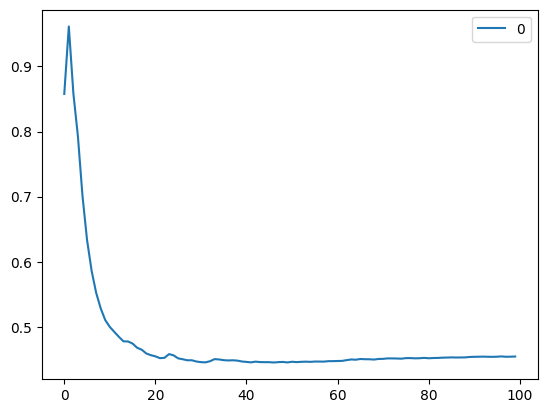

In [26]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [27]:
model.score(x_test,y_test)

0.4175833559555906

In [28]:
model = neighbors.KNeighborsRegressor(n_neighbors = 65)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.43013961474093954

# Deep Learning

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = Sequential([
    Dense(32, activation = 'relu', input_shape = (x_train.shape[1],)),
    Dropout(0.1),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train, y_train, epochs = 20, batch_size = 16, validation_data = (x_test, y_test))

Epoch 1/20
216/216 [==============================] - 2s 4ms/step - loss: -0.6251 - accuracy: 0.0000e+00 - val_loss: -2.5071 - val_accuracy: 0.0000e+00
Epoch 2/20
216/216 [==============================] - 1s 3ms/step - loss: -10.9947 - accuracy: 0.0000e+00 - val_loss: -25.4505 - val_accuracy: 0.0000e+00
Epoch 3/20
216/216 [==============================] - 1s 3ms/step - loss: -61.7597 - accuracy: 0.0000e+00 - val_loss: -107.1533 - val_accuracy: 0.0000e+00
Epoch 4/20
216/216 [==============================] - 1s 3ms/step - loss: -151.6866 - accuracy: 0.0000e+00 - val_loss: -215.3727 - val_accuracy: 0.0000e+00
Epoch 5/20
216/216 [==============================] - 1s 3ms/step - loss: -277.1000 - accuracy: 0.0000e+00 - val_loss: -368.2584 - val_accuracy: 0.0000e+00
Epoch 6/20
216/216 [==============================] - 1s 3ms/step - loss: -480.8233 - accuracy: 0.0000e+00 - val_loss: -607.2667 - val_accuracy: 0.0000e+00
Epoch 7/20
216/216 [==============================] - 1s 3ms/step - los

In [31]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

36/36 [==============================] - 0s 2ms/step - loss: -15329.3496 - accuracy: 0.0000e+00
Test loss: -15329.3496
Test accuracy: 0.0000


# Thank You